<a href="https://colab.research.google.com/github/EduardoIllanes/Style-Transfer-With-Hub/blob/main/Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from PIL import ImageOps
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def download_image(url):
    # create a temporary file ending with ".jpg"
    _, filename = tempfile.mkstemp(suffix=".jpg")
    
    # opens the given URL
    response = urlopen(url)
    
    # reads the image fetched from the URL
    image_data = response.read()
    
    # puts the image data in memory buffer
    image_data = BytesIO(image_data)
    
    # opens the image
    pil_image = Image.open(image_data)
    pil_image.save(filename, format="JPEG", quality=90)
    return filename

def display_image(image):
    """
    Displays an image inside the notebook.
    This is used by download_and_resize_image()
    """
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    image = plt.imread(image)
    plt.imshow(image)

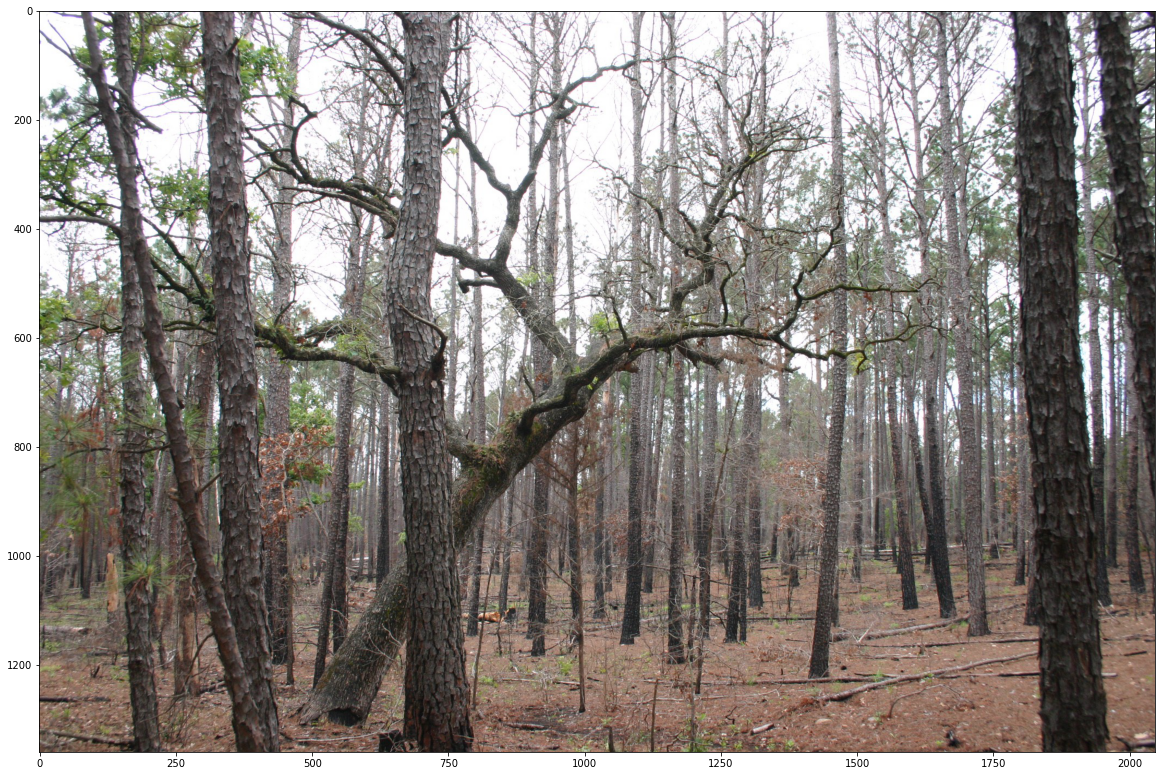

In [ ]:
wikimedia_content = 'https://upload.wikimedia.org/wikipedia/commons/6/62/Contrasting_Tree_Types_Coexist_in_a_Forest.jpg'
filename_1 = download_image(wikimedia_content)
display_image(filename_1)

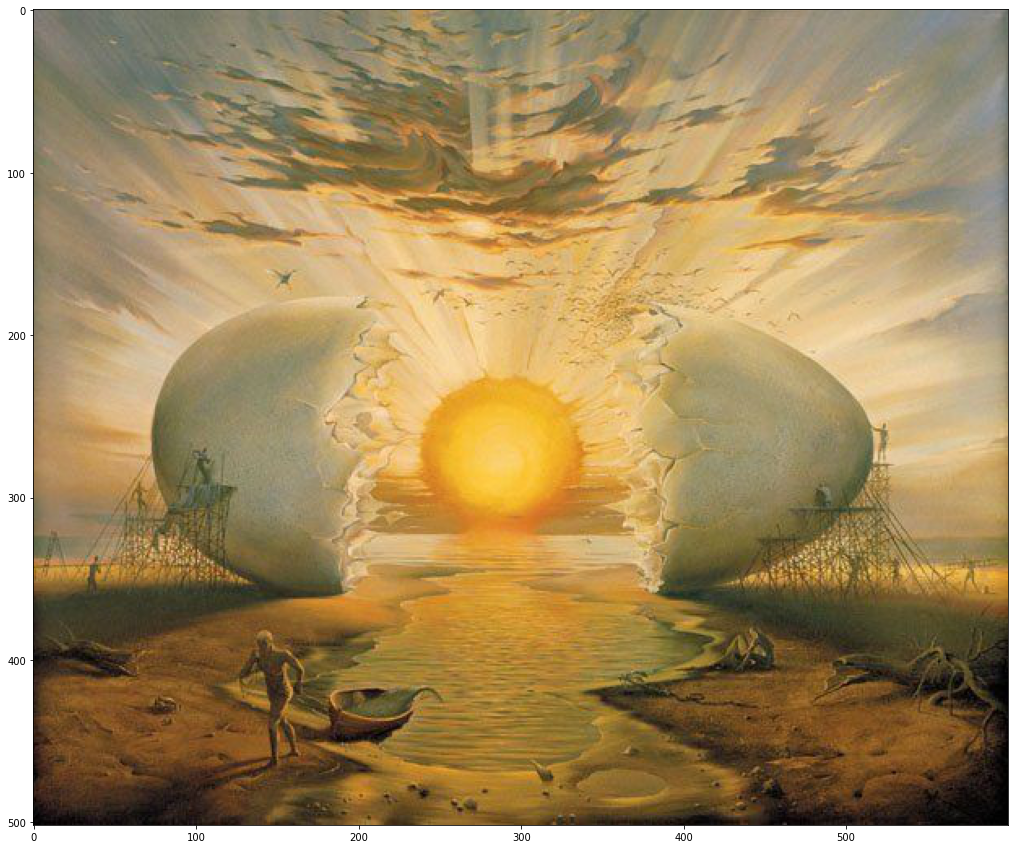

In [ ]:
wikimedia_style = 'https://artefeed.com/wp-content/uploads/2015/04/Vladimir-Kush-pinturas-que-te-hacen-pensar-1.jpg'
filename_2 = download_image(wikimedia_style)
display_image(filename_2)

In [ ]:
content_image = plt.imread(filename_1)
style_image = plt.imread(filename_2)
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = tf.image.resize(style_image, (256, 256))
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

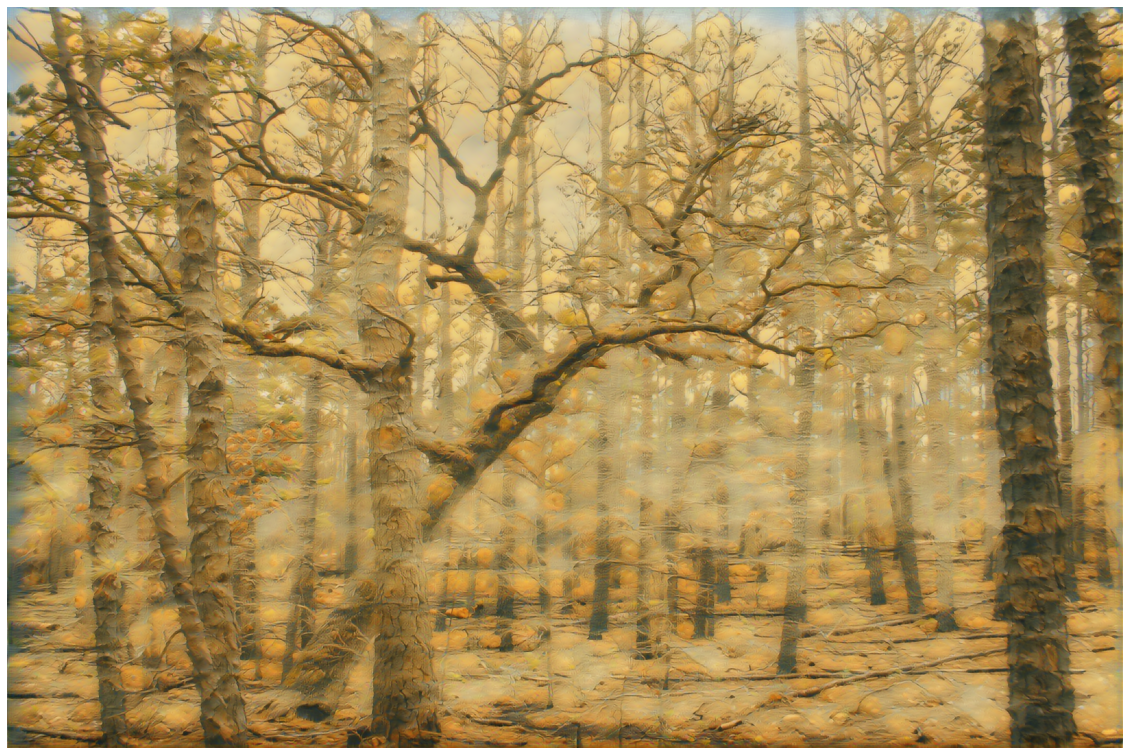

In [ ]:
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(stylized_image[0])
plt.savefig('Arte.png')